In [1]:
import pandas as pd
import numpy as np
import os
import glob
import datetime as dt
import datetime

### Weather data

In [2]:
#Collecting Beijing weather data from 2010 - 2017
df_weather_2010_2014 = pd.read_csv('./weather_2010_2014.csv',index_col=None, header=0)

df_weather_2015_2017 = pd.read_csv('./beijing_weather_2015_2017.csv',index_col=None, header=0)


In [3]:
print(df_weather_2010_2014.shape)
df_weather_2010_2014.head()

(43824, 13)


,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [4]:
#Data dictionary for weather data 2010-2014
#No: row number 
# year: year of data in this row 
# month: month of data in this row 
# day: day of data in this row 
# hour: hour of data in this row 
# pm2.5: PM2.5 concentration (ug/m^3) 
# DEWP: Dew Point (â„ƒ) 
# TEMP: Temperature (â„ƒ) 
# PRES: Pressure (hPa) 
# cbwd: Combined wind direction 
# Iws: Cumulated wind speed (m/s) 
# Is: Cumulated hours of snow 
# Ir: Cumulated hours of rain 

In [5]:
print(df_weather_2015_2017.shape)
df_weather_2015_2017.head()

(25146, 12)


,Unnamed: 0,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,hour
0,0,-204,-72,10349.0,340.0,10,NaN,NaN,2015,1,1,0
1,3,-220,-50,NaN,20.0,20,NaN,10.0,2015,1,1,1
2,5,-220,-30,NaN,30.0,30,NaN,10.0,2015,1,1,2
3,7,-225,-12,10340.0,180.0,30,NaN,71.0,2015,1,1,3
4,10,-220,0,NaN,NaN,20,NaN,10.0,2015,1,1,4


In [6]:
#Removing col 1 from weather 2015 - 2017 data
df_weather_2015_2017.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
#Change date format for the weather datasets to join with the spatial dataset
df_weather_2010_2014['date']= df_weather_2010_2014.apply(lambda row :
                          datetime.date(row.year,row.month,row.day), 
                          axis=1)

df_weather_2015_2017['date']= df_weather_2015_2017.apply(lambda row :
                          datetime.date(row.year,row.month,row.day), 
                          axis=1)

#chaging datetime to string for joining later
df_weather_2010_2014['date'] = df_weather_2010_2014['date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

df_weather_2015_2017['date'] = df_weather_2015_2017['date'].apply(lambda x: dt.datetime.strftime(x, '%Y-%m-%d'))

In [8]:
df_weather_2010_2014.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
date        0
dtype: int64

In [9]:
df_weather_2015_2017.isnull().sum()

dew_point                    0
air_temp                     0
air_pressure             16772
wind_dir                  3992
wind_speed                   0
cumulative_snow_hours    16884
cumulative_rain_hours     1414
year                         0
month                        0
day                          0
hour                         0
date                         0
dtype: int64

### Spatial Pollution data

In [10]:
#Collecting spatial datasets from 2015 to 2017
from pandas.io.common import EmptyDataError
def create_dataframe(path):
    allFiles = glob.glob(path + "/*.csv")
#     print(allFiles)
    df_2015 = pd.DataFrame()
    list_ = []
    for file_ in allFiles:
        try:
            df = pd.read_csv(file_,index_col=None, header=0)
        except EmptyDataError:
            df = pd.DataFrame()
        list_.append(df)
    frame = pd.concat(list_)
    return frame



### Data for 2015

In [11]:

path_2015 =r'./beijing_20150101-20151231' 
df_2015 = create_dataframe(path_2015)
df_2015.head()

,date,hour,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,20150101,0,PM2.5,3.0,7.7,5.7,3.0,13.7,12.5,6.9,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
1,20150101,0,PM2.5_24h,3.4,6.7,8.5,4.1,8.5,6.9,5.0,...,4.1,7.1,16.6,12.5,31.4,9.8,10.2,10.2,11.3,8.3
2,20150101,0,PM10,14.3,14.4,6.4,21.1,50.2,29.2,16.1,...,22.1,41.1,64.6,22.0,NaN,15.9,20.8,29.2,17.5,53.3
3,20150101,0,PM10_24h,45.7,57.5,30.4,43.3,48.9,54.7,44.8,...,22.9,46.7,115.1,59.2,58.4,40.0,60.2,57.9,58.7,58.1
4,20150101,0,AQI,46.0,54.0,31.0,44.0,49.0,53.0,45.0,...,23.0,47.0,83.0,55.0,55.0,40.0,56.0,54.0,55.0,55.0


In [12]:
df_2015.columns = ['date_before_join', 'hour','type','Dongsi','Temple of Heaven','Guanyuan Park','Wanshou Park','National Olympic Sports Center',
                 'National Agricultural Exhibition Center','Wanliu Road','Northern New District','Botanical Garden',
                 'Fengtai Garden','Yungang','Gucheng Park','Fangshan','Daxing','Yizhuang','Tongzhou','Shunyi',
                 'Changping','Mentougou','Pinggu','Huairou','Miyun','Yanqing','Dingling','Badaling',
                 'Miyun Reservoir','Donggaocun','Yongledian','Yufa','Liulihe','Qianmen','Yongdingmennei St','Xizhimen N St',
                'Nansanhuan W St','Dongsihuan N St']
df_2015.head()

,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,National Agricultural Exhibition Center,Wanliu Road,...,Miyun Reservoir,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St
0,20150101,0,PM2.5,3.0,7.7,5.7,3.0,13.7,12.5,6.9,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
1,20150101,0,PM2.5_24h,3.4,6.7,8.5,4.1,8.5,6.9,5.0,...,4.1,7.1,16.6,12.5,31.4,9.8,10.2,10.2,11.3,8.3
2,20150101,0,PM10,14.3,14.4,6.4,21.1,50.2,29.2,16.1,...,22.1,41.1,64.6,22.0,NaN,15.9,20.8,29.2,17.5,53.3
3,20150101,0,PM10_24h,45.7,57.5,30.4,43.3,48.9,54.7,44.8,...,22.9,46.7,115.1,59.2,58.4,40.0,60.2,57.9,58.7,58.1
4,20150101,0,AQI,46.0,54.0,31.0,44.0,49.0,53.0,45.0,...,23.0,47.0,83.0,55.0,55.0,40.0,56.0,54.0,55.0,55.0


In [13]:
df_2015.shape

(112931, 38)

In [14]:
df_2015.isnull().sum()

date_before_join                               0
hour                                           0
type                                           0
Dongsi                                     11344
Temple of Heaven                           12348
Guanyuan Park                              11420
Wanshou Park                               11300
National Olympic Sports Center             11233
National Agricultural Exhibition Center    12313
Wanliu Road                                13161
Northern New District                      12867
Botanical Garden                           14633
Fengtai Garden                             11348
Yungang                                    10778
Gucheng Park                               11224
Fangshan                                   13067
Daxing                                     11618
Yizhuang                                   11601
Tongzhou                                   10815
Shunyi                                     13685
Changping           

### Data for 2016

In [15]:
path_2016 =r'./beijing_20160101-20161231' 
df_2016 = create_dataframe(path_2016)

In [16]:
df_2016.head()

,date,hour,type,东四,天坛,官园,万寿西宫,奥体中心,农展馆,万柳,...,密云水库,东高村,永乐店,榆垡,琉璃河,前门,永定门内,西直门北,南三环,东四环
0,20160101,0,PM2.5,200.0,193.0,183.0,195.0,209.0,218.0,155.0,...,57.0,201.0,316.0,305.0,348.0,205.0,204.0,214.0,236.0,250.0
1,20160101,0,PM2.5_24h,70.0,64.0,63.0,68.0,65.0,68.0,75.0,...,29.0,75.0,156.0,169.0,197.0,77.0,80.0,74.0,80.0,81.0
2,20160101,0,PM10,209.0,209.0,244.0,200.0,268.0,NaN,166.0,...,NaN,NaN,NaN,378.0,NaN,214.0,213.0,276.0,271.0,271.0
3,20160101,0,PM10_24h,110.0,139.0,123.0,148.0,189.0,NaN,98.0,...,NaN,NaN,NaN,283.0,NaN,110.0,128.0,112.0,119.0,151.0
4,20160101,0,AQI,94.0,95.0,87.0,100.0,120.0,92.0,100.0,...,67.0,100.0,206.0,219.0,247.0,104.0,107.0,99.0,107.0,108.0


In [17]:
df_2016.shape

(113304, 38)

In [18]:
df_2016.isnull().sum()

date        0
hour        0
type        0
东四      18290
天坛      15723
官园      14841
万寿西宫    16587
奥体中心    17519
农展馆     16256
万柳      16309
北部新区    20288
植物园     19138
丰台花园    16835
云岗      16303
古城      14693
房山      17991
大兴      18909
亦庄      16151
通州      17262
顺义      20594
昌平      14586
门头沟     15617
平谷      17287
怀柔      17665
密云      16933
延庆      16886
定陵      17541
八达岭     41298
密云水库    17589
东高村     22967
永乐店     19562
榆垡      17361
琉璃河     20286
前门      17007
永定门内    17574
西直门北    16721
南三环     22546
东四环     16526
dtype: int64

In [19]:
df_2016.columns = ['date_before_join', 'hour','type','Dongsi','Temple of Heaven','Guanyuan Park','Wanshou Park','National Olympic Sports Center',
                 'National Agricultural Exhibition Center','Wanliu Road','Northern New District','Botanical Garden',
                 'Fengtai Garden','Yungang','Gucheng Park','Fangshan','Daxing','Yizhuang','Tongzhou','Shunyi',
                 'Changping','Mentougou','Pinggu','Huairou','Miyun','Yanqing','Dingling','Badaling',
                 'Miyun Reservoir','Donggaocun','Yongledian','Yufa','Liulihe','Qianmen','Yongdingmennei St','Xizhimen N St',
                'Nansanhuan W St','Dongsihuan N St']
df_2016.head()

,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,National Agricultural Exhibition Center,Wanliu Road,...,Miyun Reservoir,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St
0,20160101,0,PM2.5,200.0,193.0,183.0,195.0,209.0,218.0,155.0,...,57.0,201.0,316.0,305.0,348.0,205.0,204.0,214.0,236.0,250.0
1,20160101,0,PM2.5_24h,70.0,64.0,63.0,68.0,65.0,68.0,75.0,...,29.0,75.0,156.0,169.0,197.0,77.0,80.0,74.0,80.0,81.0
2,20160101,0,PM10,209.0,209.0,244.0,200.0,268.0,NaN,166.0,...,NaN,NaN,NaN,378.0,NaN,214.0,213.0,276.0,271.0,271.0
3,20160101,0,PM10_24h,110.0,139.0,123.0,148.0,189.0,NaN,98.0,...,NaN,NaN,NaN,283.0,NaN,110.0,128.0,112.0,119.0,151.0
4,20160101,0,AQI,94.0,95.0,87.0,100.0,120.0,92.0,100.0,...,67.0,100.0,206.0,219.0,247.0,104.0,107.0,99.0,107.0,108.0


### Data for 2017

In [20]:
path_2017 =r'./beijing_20170101-20171111' 
df_2017 = create_dataframe(path_2017)


In [21]:
df_2017.shape

(88097, 40)

In [22]:
df_2017.columns = ['col1','col2','date_before_join', 'hour','type','Dongsi','Temple of Heaven','Guanyuan Park','Wanshou Park','National Olympic Sports Center',
                 'National Agricultural Exhibition Center','Wanliu Road','Northern New District','Botanical Garden',
                 'Fengtai Garden','Yungang','Gucheng Park','Fangshan','Daxing','Yizhuang','Tongzhou','Shunyi',
                 'Changping','Mentougou','Pinggu','Huairou','Miyun','Yanqing','Dingling','Badaling',
                 'Miyun Reservoir','Donggaocun','Yongledian','Yufa','Liulihe','Qianmen','Yongdingmennei St','Xizhimen N St',
                'Nansanhuan W St','Dongsihuan N St']
df_2017.head()

,col1,col2,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,...,Miyun Reservoir,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St
0,NaN,NaN,20170101.0,22.0,PM2.5,416.0,468.0,469.0,390.0,377.0,...,495.0,458.0,285.0,329.0,415.0,376.0,514.0,376.0,564.0,386.0
1,NaN,NaN,20170101.0,22.0,PM2.5_24h,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,20170101.0,22.0,PM10,474.0,518.0,594.0,394.0,NaN,...,588.0,490.0,322.0,NaN,NaN,447.0,NaN,409.0,679.0,477.0
3,NaN,NaN,20170101.0,22.0,PM10_24h,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,20170101.0,22.0,AQI,444.0,479.0,494.0,427.0,418.0,...,497.0,472.0,335.0,379.0,443.0,417.0,500.0,417.0,500.0,424.0


In [23]:
df_2017.isnull().sum()

col1                                       87971
col2                                       88097
date_before_join                             126
hour                                         126
type                                         126
Dongsi                                     45244
Temple of Heaven                           43964
Guanyuan Park                              44430
Wanshou Park                               56155
National Olympic Sports Center             48433
National Agricultural Exhibition Center    43792
Wanliu Road                                44348
Northern New District                      44143
Botanical Garden                           43785
Fengtai Garden                             44980
Yungang                                    45861
Gucheng Park                               46365
Fangshan                                   56160
Daxing                                     43575
Yizhuang                                   44084
Tongzhou            

In [24]:
# df_2017.to_csv('df_2017_test.csv', sep=',')

In [25]:
#Dropping columns 1 and 2 from the 2017 dataset
df_2017.drop('col1', axis=1, inplace=True)
df_2017.drop('col2', axis=1, inplace=True)
df_2017.head()

,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,National Agricultural Exhibition Center,Wanliu Road,...,Miyun Reservoir,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St
0,20170101.0,22.0,PM2.5,416.0,468.0,469.0,390.0,377.0,391.0,415.0,...,495.0,458.0,285.0,329.0,415.0,376.0,514.0,376.0,564.0,386.0
1,20170101.0,22.0,PM2.5_24h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,20170101.0,22.0,PM10,474.0,518.0,594.0,394.0,NaN,496.0,495.0,...,588.0,490.0,322.0,NaN,NaN,447.0,NaN,409.0,679.0,477.0
3,20170101.0,22.0,PM10_24h,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,20170101.0,22.0,AQI,444.0,479.0,494.0,427.0,418.0,427.0,443.0,...,497.0,472.0,335.0,379.0,443.0,417.0,500.0,417.0,500.0,424.0


### Joining the spatial datasets for years 2015 - 2017

In [26]:
#concatenating datasets for 2015 - 2017
df_2015_2017 = pd.concat([df_2015,df_2016,df_2017], ignore_index=True)


In [27]:
df_2015_2017.shape

(314332, 38)

In [28]:
df_2015_2017.head()

,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,National Agricultural Exhibition Center,Wanliu Road,...,Miyun Reservoir,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St
0,20150101.0,0.0,PM2.5,3.0,7.7,5.7,3.0,13.7,12.5,6.9,...,5.3,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5
1,20150101.0,0.0,PM2.5_24h,3.4,6.7,8.5,4.1,8.5,6.9,5.0,...,4.1,7.1,16.6,12.5,31.4,9.8,10.2,10.2,11.3,8.3
2,20150101.0,0.0,PM10,14.3,14.4,6.4,21.1,50.2,29.2,16.1,...,22.1,41.1,64.6,22.0,NaN,15.9,20.8,29.2,17.5,53.3
3,20150101.0,0.0,PM10_24h,45.7,57.5,30.4,43.3,48.9,54.7,44.8,...,22.9,46.7,115.1,59.2,58.4,40.0,60.2,57.9,58.7,58.1
4,20150101.0,0.0,AQI,46.0,54.0,31.0,44.0,49.0,53.0,45.0,...,23.0,47.0,83.0,55.0,55.0,40.0,56.0,54.0,55.0,55.0


In [29]:
#converting the date column
df_2015_2017['date_before_join']=df_2015_2017['date_before_join'].apply(str)
# df_2015_2017['date'].dtype
df_2015_2017['date']= df_2015_2017.date_before_join.str[:4] + '-' + df_2015_2017.date_before_join.str[4:6] +'-'+ df_2015_2017.date_before_join.str[6:8]
df_2015_2017.head()

,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,National Agricultural Exhibition Center,Wanliu Road,...,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St,date
0,20150101.0,0.0,PM2.5,3.0,7.7,5.7,3.0,13.7,12.5,6.9,...,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5,2015-01-01
1,20150101.0,0.0,PM2.5_24h,3.4,6.7,8.5,4.1,8.5,6.9,5.0,...,7.1,16.6,12.5,31.4,9.8,10.2,10.2,11.3,8.3,2015-01-01
2,20150101.0,0.0,PM10,14.3,14.4,6.4,21.1,50.2,29.2,16.1,...,41.1,64.6,22.0,NaN,15.9,20.8,29.2,17.5,53.3,2015-01-01
3,20150101.0,0.0,PM10_24h,45.7,57.5,30.4,43.3,48.9,54.7,44.8,...,46.7,115.1,59.2,58.4,40.0,60.2,57.9,58.7,58.1,2015-01-01
4,20150101.0,0.0,AQI,46.0,54.0,31.0,44.0,49.0,53.0,45.0,...,47.0,83.0,55.0,55.0,40.0,56.0,54.0,55.0,55.0,2015-01-01


In [30]:
#Filtering out rows with PM2.5 data only
df_2015_2017_pm = df_2015_2017.loc[df_2015_2017['type'] == 'PM2.5' ]
df_2015_2017_pm.head()

,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,National Agricultural Exhibition Center,Wanliu Road,...,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St,date
0,20150101.0,0.0,PM2.5,3.0,7.7,5.7,3.0,13.7,12.5,6.9,...,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5,2015-01-01
5,20150101.0,1.0,PM2.5,5.2,3.7,7.9,3.0,11.4,8.1,3.4,...,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0,2015-01-01
10,20150101.0,2.0,PM2.5,4.4,11.2,3.8,3.9,13.6,7.4,3.0,...,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7,2015-01-01
15,20150101.0,3.0,PM2.5,3.0,3.5,4.9,4.2,10.1,7.5,4.5,...,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8,2015-01-01
20,20150101.0,4.0,PM2.5,4.0,6.1,3.0,4.4,12.9,11.5,4.4,...,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0,2015-01-01


In [31]:
df_2015_2017_pm['avg_air_pollution'] = df_2015_2017_pm[['Dongsi','Temple of Heaven','Guanyuan Park','Wanshou Park','National Olympic Sports Center',
                 'National Agricultural Exhibition Center','Wanliu Road','Northern New District','Botanical Garden',
                 'Fengtai Garden','Yungang','Gucheng Park','Fangshan','Daxing','Yizhuang','Tongzhou','Shunyi',
                 'Changping','Mentougou','Pinggu','Huairou','Miyun','Yanqing','Dingling','Badaling',
                 'Miyun Reservoir','Donggaocun','Yongledian','Yufa','Liulihe','Qianmen','Yongdingmennei St','Xizhimen N St',
                'Nansanhuan W St','Dongsihuan N St']].mean(axis=1)



/Applications/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [32]:
df_2015_2017_pm.head()

,date_before_join,hour,type,Dongsi,Temple of Heaven,Guanyuan Park,Wanshou Park,National Olympic Sports Center,National Agricultural Exhibition Center,Wanliu Road,...,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St,date,avg_air_pollution
0,20150101.0,0.0,PM2.5,3.0,7.7,5.7,3.0,13.7,12.5,6.9,...,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5,2015-01-01,14.644118
5,20150101.0,1.0,PM2.5,5.2,3.7,7.9,3.0,11.4,8.1,3.4,...,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0,2015-01-01,16.429412
10,20150101.0,2.0,PM2.5,4.4,11.2,3.8,3.9,13.6,7.4,3.0,...,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7,2015-01-01,18.444118
15,20150101.0,3.0,PM2.5,3.0,3.5,4.9,4.2,10.1,7.5,4.5,...,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8,2015-01-01,15.455882
20,20150101.0,4.0,PM2.5,4.0,6.1,3.0,4.4,12.9,11.5,4.4,...,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0,2015-01-01,15.773529


### Merging weather and Beijing spatial dataset for yeras 2015 - 2017

In [33]:
merged_2015_2017 = pd.merge(df_weather_2015_2017, df_2015_2017_pm, how='left', on=['date', 'hour'])

In [34]:
merged_2015_2017.head(10)

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,...,Donggaocun,Yongledian,Yufa,Liulihe,Qianmen,Yongdingmennei St,Xizhimen N St,Nansanhuan W St,Dongsihuan N St,avg_air_pollution
0,-204,-72,10349.0,340.0,10,NaN,NaN,2015,1,1,...,20.3,44.4,8.3,139.2,13.2,9.6,14.4,7.0,20.5,14.644118
1,-220,-50,NaN,20.0,20,NaN,10.0,2015,1,1,...,13.3,37.9,23.6,184.6,5.6,7.9,9.5,9.2,32.0,16.429412
2,-220,-30,NaN,30.0,30,NaN,10.0,2015,1,1,...,8.3,43.0,40.6,230.4,5.5,5.6,7.0,4.9,12.7,18.444118
3,-225,-12,10340.0,180.0,30,NaN,71.0,2015,1,1,...,7.9,19.2,90.5,153.1,5.9,6.7,3.7,7.6,19.8,15.455882
4,-220,0,NaN,NaN,20,NaN,10.0,2015,1,1,...,4.0,30.6,102.2,159.8,8.9,6.6,6.4,3.0,9.0,15.773529
5,-220,10,NaN,160.0,30,NaN,10.0,2015,1,1,...,6.0,26.7,97.3,154.5,5.9,6.1,8.3,6.6,11.2,16.317647
6,-234,22,10289.0,220.0,30,NaN,6.0,2015,1,1,...,6.5,29.2,93.5,147.6,9.7,11.8,6.5,7.6,18.5,16.435294
7,-230,20,NaN,200.0,30,NaN,10.0,2015,1,1,...,9.1,18.0,102.4,148.1,3.0,13.1,7.1,13.3,20.9,18.826471
8,-240,20,NaN,180.0,40,NaN,10.0,2015,1,1,...,4.9,29.2,99.8,154.3,6.3,12.5,12.2,14.0,22.8,21.505882
9,-228,1,10269.0,220.0,10,,1.0,2015,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# 16884
merged_2015_2017.isnull().sum()

dew_point                                      0
air_temp                                       0
air_pressure                               16772
wind_dir                                    3992
wind_speed                                     0
cumulative_snow_hours                      16884
cumulative_rain_hours                       1414
year                                           0
month                                          0
day                                            0
hour                                           0
date                                           0
date_before_join                            1063
type                                        1063
Dongsi                                      1981
Temple of Heaven                            1589
Guanyuan Park                               1671
Wanshou Park                                3547
National Olympic Sports Center              2122
National Agricultural Exhibition Center     1739
Wanliu Road         

In [36]:
df_2015_2017_pm.isnull().sum()

date_before_join                              0
hour                                          0
type                                          0
Dongsi                                      921
Temple of Heaven                            527
Guanyuan Park                               609
Wanshou Park                               2495
National Olympic Sports Center             1062
National Agricultural Exhibition Center     677
Wanliu Road                                 645
Northern New District                      1279
Botanical Garden                           1493
Fengtai Garden                              974
Yungang                                     850
Gucheng Park                                862
Fangshan                                   2721
Daxing                                      911
Yizhuang                                    786
Tongzhou                                    701
Shunyi                                      698
Changping                               

In [37]:
df_2015_2017_pm.shape

(24161, 40)

In [38]:
df_weather_2015_2017.shape

(25146, 12)

In [39]:
merged_2015_2017.shape

(25146, 50)

In [40]:
# pd.isnull(merged_2015_2017.avg_air_pollution)
# merged_temp = merged_2015_2017[merged_2015_2017['avg_air_pollution'].isnull()]

In [41]:
# merged_temp.to_csv('merged_temp.csv', sep=',')

In [42]:
# merged_2015_2017.to_csv('merged_dataset.csv',sep=',')

In [43]:
merged_2015_2017.columns

Index(['dew_point', 'air_temp', 'air_pressure', 'wind_dir', 'wind_speed',
       'cumulative_snow_hours', 'cumulative_rain_hours', 'year', 'month',
       'day', 'hour', 'date', 'date_before_join', 'type', 'Dongsi',
       'Temple of Heaven', 'Guanyuan Park', 'Wanshou Park',
       'National Olympic Sports Center',
       'National Agricultural Exhibition Center', 'Wanliu Road',
       'Northern New District', 'Botanical Garden', 'Fengtai Garden',
       'Yungang', 'Gucheng Park', 'Fangshan', 'Daxing', 'Yizhuang', 'Tongzhou',
       'Shunyi', 'Changping', 'Mentougou', 'Pinggu', 'Huairou', 'Miyun',
       'Yanqing', 'Dingling', 'Badaling', 'Miyun Reservoir', 'Donggaocun',
       'Yongledian', 'Yufa', 'Liulihe', 'Qianmen', 'Yongdingmennei St',
       'Xizhimen N St', 'Nansanhuan W St', 'Dongsihuan N St',
       'avg_air_pollution'],
      dtype='object')

In [44]:
merged_2015_2017 = merged_2015_2017.fillna(merged_2015_2017.mean())

In [45]:
merged_2015_2017.to_csv('merged_spatial_weather_2015_2017.csv', sep=',')

In [46]:
#creating new dataset from merged dataset with required columns

merged_new = merged_2015_2017[['dew_point', 'air_temp', 'air_pressure', 'wind_dir', 'wind_speed',
       'cumulative_snow_hours', 'cumulative_rain_hours', 'year', 'month',
       'day', 'hour', 'date','avg_air_pollution']]
merged_new=merged_new.rename(columns = {'avg_air_pollution':'pm2.5'})

In [47]:
merged_new.head()

,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,year,month,day,hour,date,pm2.5
0,-204,-72,10349.000000,340.000000,10,NaN,7.510703,2015,1,1,0,2015-01-01,14.644118
1,-220,-50,10165.197636,20.000000,20,NaN,10.000000,2015,1,1,1,2015-01-01,16.429412
2,-220,-30,10165.197636,30.000000,30,NaN,10.000000,2015,1,1,2,2015-01-01,18.444118
3,-225,-12,10340.000000,180.000000,30,NaN,71.000000,2015,1,1,3,2015-01-01,15.455882
4,-220,0,10165.197636,180.584287,20,NaN,10.000000,2015,1,1,4,2015-01-01,15.773529


In [48]:
#changing column names to match merged dataset
df_weather_2010_2014.columns = ['No','year','month','day','hour','pm2.5','dew_point', 'air_temp', 'air_pressure', 'wind_dir', 
                                'wind_speed','cumulative_snow_hours', 'cumulative_rain_hours','date']

df_weather_2010_2014.drop('No', axis=1, inplace=True)
df_weather_2010_2014.head()

,year,month,day,hour,pm2.5,dew_point,air_temp,air_pressure,wind_dir,wind_speed,cumulative_snow_hours,cumulative_rain_hours,date
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01


In [49]:
#concatenating the merged and weather datasets
merged_final = pd.concat([df_weather_2010_2014,merged_new], ignore_index=True)
merged_final.shape

(68970, 13)

In [50]:
merged_final.isnull().sum()

air_pressure                 0
air_temp                     0
cumulative_rain_hours        0
cumulative_snow_hours    16884
date                         0
day                          0
dew_point                    0
hour                         0
month                        0
pm2.5                     2067
wind_dir                     0
wind_speed                   0
year                         0
dtype: int64

In [51]:
#filling mean for all the NaN values in the column

merged_final = merged_final.fillna(merged_final.mean())

In [52]:
merged_final.dtypes

air_pressure             float64
air_temp                 float64
cumulative_rain_hours    float64
cumulative_snow_hours     object
date                      object
day                        int64
dew_point                  int64
hour                       int64
month                      int64
pm2.5                    float64
wind_dir                  object
wind_speed               float64
year                       int64
dtype: object

In [53]:
merged_final.isnull().sum()

air_pressure                 0
air_temp                     0
cumulative_rain_hours        0
cumulative_snow_hours    16884
date                         0
day                          0
dew_point                    0
hour                         0
month                        0
pm2.5                        0
wind_dir                     0
wind_speed                   0
year                         0
dtype: int64

In [54]:
merged_final.cumulative_snow_hours.unique()

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 16, 17, 19, 20,
       21, 22, 23, 24, 25, 26, 27, 14, 18, nan, '  ', '94', 'P2', '14',
       '18', '12', '09', '16', '17', '15', '10', '08', '07', '95', '44',
       '62', '34', '05', '19', '25', '75', '51', '61', '84', '22', '13',
       'U ', '11', '42', '45', '65', '35', '52', '02', '54', '55', '60',
       '72', '81', '04', 'NO', ' R', '74', '32', '85', '24', '20', '82',
       '99', '06', '41', '21', '31', '64', '01', '03', '92', '23', '71',
       'BE'], dtype=object)

In [55]:
#Cleaning the cumulative_snow_hours feature
merged_final.cumulative_snow_hours = merged_final.cumulative_snow_hours.replace({'U ': np.nan,"NO": np.nan, '  ': np.nan
                                                   ,"P2": np.nan})

In [56]:
merged_final['cumulative_snow_hours'] = pd.to_numeric(merged_final.cumulative_snow_hours, errors='coerce')

In [57]:
merged_final.dtypes


air_pressure             float64
air_temp                 float64
cumulative_rain_hours    float64
cumulative_snow_hours    float64
date                      object
day                        int64
dew_point                  int64
hour                       int64
month                      int64
pm2.5                    float64
wind_dir                  object
wind_speed               float64
year                       int64
dtype: object

In [58]:
#Filling mean of column for NaN values in the cumulative_snow_hours feature
merged_final.cumulative_snow_hours = merged_final.cumulative_snow_hours.fillna(merged_final.cumulative_snow_hours.mean())

In [59]:
merged_final.to_csv('merged_final_v2.csv', sep=',')

In [60]:
merged_final.shape

(68970, 13)

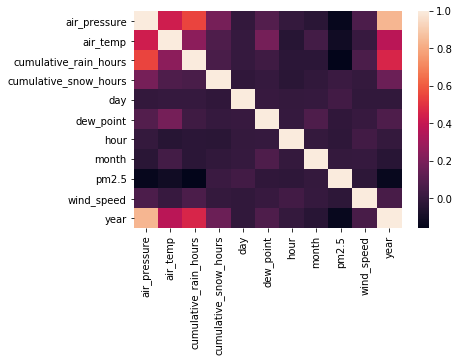

In [61]:
import seaborn as sns
%matplotlib inline  
corr = merged_final.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [63]:
summary_stats = np.round(merged_final.describe(), 2)
summary_stats.rename(columns={'50%':'median'}, inplace=True)
summary_stats

,air_pressure,air_temp,cumulative_rain_hours,cumulative_snow_hours,day,dew_point,hour,month,pm2.5,wind_speed,year
count,68970.00,68970.00,68970.00,68970.00,68970.00,68970.00,68970.00,68970.00,68970.00,68970.00,68970.00
mean,4352.02,60.88,2.86,0.76,15.69,20.15,11.50,6.44,89.31,54.62,2013.44
std,4403.63,147.48,6.39,4.92,8.80,262.95,6.92,3.41,83.94,544.56,2.27
min,991.00,-160.00,0.00,0.00,1.00,-341.00,0.00,1.00,0.00,0.00,2010.00
25%,1013.00,4.00,0.00,0.00,8.00,-14.00,6.00,3.00,28.00,3.13,2011.00
50%,1026.00,20.00,0.00,0.00,16.00,5.00,12.00,6.00,68.58,10.29,2013.00
75%,10165.20,70.00,6.00,0.76,23.00,21.00,18.00,9.00,117.77,30.00,2015.00
max,10465.00,9999.00,81.00,99.00,31.00,9999.00,23.00,12.00,994.00,9999.00,2017.00
